<a href="https://colab.research.google.com/github/sung429/DeepLearning/blob/master/keras_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import imdb

In [2]:
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 1s 0us/step


In [3]:
train_data.shape

(25000,)

In [4]:
test_data.shape

(25000,)

In [5]:
type(train_labels)

numpy.ndarray

In [0]:
import numpy as np

In [7]:
np.bincount(train_labels)

array([12500, 12500])

In [11]:
max([max(sequence) for sequence in train_data])

9999

In [12]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]] # 0, 1, 2 는 패딩, 문서 시작, 사전에 없음이므로 3을 뺌
)

1646592/1641221 [==============================] - 1s 0us/step


In [13]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [0]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences),dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [15]:
x_train.shape

(25000, 10000)

In [16]:
x_test.shape

(25000, 10000)

In [21]:
x_train[0].shape

(10000,)

In [20]:
np.bincount(x_train[0].astype('int64'))

array([9880,  120])

In [29]:
for i, sequence in enumerate(train_data):
  results = np.zeros((25000,10000))
  results[i, sequence] = 1.
  print(sequence)
  break

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [30]:
results[0, sequence]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [32]:
results[0,[1,2]]

array([1., 1.])

In [33]:
type(x_train)

numpy.ndarray

In [34]:
type(train_labels)

numpy.ndarray

In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
from keras import models
from keras import layers

In [37]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [38]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [43]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))




Train on 15000 samples, validate on 10000 samples
Epoch 1/20





15000/15000 [==============================] - 5s 361us/step - loss: 0.5069 - acc: 0.7807 - val_loss: 0.3834 - val_acc: 0.8663
Epoch 2/20
15000/15000 [==============================] - 1s 73us/step - loss: 0.3004 - acc: 0.9017 - val_loss: 0.3031 - val_acc: 0.8877
Epoch 3/20
15000/15000 [==============================] - 1s 75us/step - loss: 0.2172 - acc: 0.9280 - val_loss: 0.2968 - val_acc: 0.8823
Epoch 4/20
15000/15000 [==============================] - 1s 73us/step - loss: 0.1735 - acc: 0.9440 - val_loss: 0.2749 - val_acc: 0.8898
Epoch 5/20
15000/15000 [==============================] - 1s 73us/step - loss: 0.1432 - acc: 0.9537 - val_loss: 0.2881 - val_acc: 0.8881
Epoch 6/20
15000/15000 [==============================] - 1s 74us/step - loss: 0.1197 - acc: 0.9633 - val_loss: 0.2931 - val_acc: 0.8865
Epoch 7/20
15000/15000 [==============================] - 1s 73us/step - loss: 0.0954 - acc: 0.9731 - val_loss: 0.3144 

In [0]:
history_dict = history.history

In [45]:
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [0]:
import matplotlib.pyplot as plt

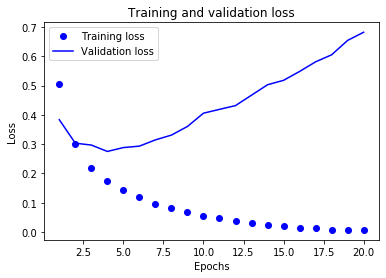

In [47]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

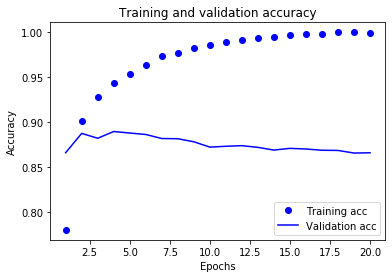

In [48]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [49]:
model.predict(x_test)

array([[0.00263584],
       [0.99999964],
       [0.10760641],
       ...,
       [0.00234881],
       [0.00725222],
       [0.5632432 ]], dtype=float32)

In [51]:
# 1개의 hidden layer
model = models.Sequential()
model.add(layers.Dense(16, activation='relu',input_shape=(10000,)))
# model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
model.evaluate(x_test,y_test)

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 90us/step - loss: 0.5110 - acc: 0.7970 - val_loss: 0.4011 - val_acc: 0.8689
Epoch 2/20
15000/15000 [==============================] - 1s 76us/step - loss: 0.3309 - acc: 0.9007 - val_loss: 0.3269 - val_acc: 0.8828
Epoch 3/20
15000/15000 [==============================] - 1s 75us/step - loss: 0.2568 - acc: 0.9223 - val_loss: 0.2937 - val_acc: 0.8897
Epoch 4/20
15000/15000 [==============================] - 1s 75us/step - loss: 0.2104 - acc: 0.9363 - val_loss: 0.2787 - val_acc: 0.8904
Epoch 5/20
15000/15000 [==============================] - 1s 75us/step - loss: 0.1782 - acc: 0.9458 - val_loss: 0.2729 - val_acc: 0.8903
Epoch 6/20
15000/15000 [==============================] - 1s 77us/step - loss: 0.1550 - acc: 0.9551 - val_loss: 0.2739 - val_acc: 0.8902
Epoch 7/20
15000/15000 [==============================] - 1s 76us/step - loss: 0.1363 - acc: 0.9614 - val_loss: 0.2807 - val_acc

[0.4880905333566666, 0.8594]

In [52]:
# 3개의 hidden layer
model = models.Sequential()
model.add(layers.Dense(16, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
model.evaluate(x_test,y_test)

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 94us/step - loss: 0.5377 - acc: 0.7681 - val_loss: 0.4006 - val_acc: 0.8611
Epoch 2/20
15000/15000 [==============================] - 1s 78us/step - loss: 0.3136 - acc: 0.8999 - val_loss: 0.3684 - val_acc: 0.8465
Epoch 3/20
15000/15000 [==============================] - 1s 77us/step - loss: 0.2215 - acc: 0.9270 - val_loss: 0.2963 - val_acc: 0.8854
Epoch 4/20
15000/15000 [==============================] - 1s 76us/step - loss: 0.1706 - acc: 0.9455 - val_loss: 0.3455 - val_acc: 0.8679
Epoch 5/20
15000/15000 [==============================] - 1s 78us/step - loss: 0.1397 - acc: 0.9559 - val_loss: 0.2937 - val_acc: 0.8861
Epoch 6/20
15000/15000 [==============================] - 1s 76us/step - loss: 0.1136 - acc: 0.9650 - val_loss: 0.3135 - val_acc: 0.8851
Epoch 7/20
15000/15000 [==============================] - 1s 77us/step - loss: 0.0880 - acc: 0.9742 - val_loss: 0.3380 - val_acc

[0.8116433194971084, 0.85092]

In [53]:
# 2개의 hidden layer
model = models.Sequential()
model.add(layers.Dense(16, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
# model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
model.evaluate(x_test,y_test)

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 97us/step - loss: 0.5178 - acc: 0.7836 - val_loss: 0.3981 - val_acc: 0.8546
Epoch 2/20
15000/15000 [==============================] - 1s 76us/step - loss: 0.3063 - acc: 0.9030 - val_loss: 0.3087 - val_acc: 0.8851
Epoch 3/20
15000/15000 [==============================] - 1s 78us/step - loss: 0.2226 - acc: 0.9299 - val_loss: 0.2772 - val_acc: 0.8909
Epoch 4/20
15000/15000 [==============================] - 1s 78us/step - loss: 0.1727 - acc: 0.9451 - val_loss: 0.2944 - val_acc: 0.8803
Epoch 5/20
15000/15000 [==============================] - 1s 82us/step - loss: 0.1420 - acc: 0.9556 - val_loss: 0.2813 - val_acc: 0.8873
Epoch 6/20
15000/15000 [==============================] - 1s 77us/step - loss: 0.1152 - acc: 0.9655 - val_loss: 0.2958 - val_acc: 0.8851
Epoch 7/20
15000/15000 [==============================] - 1s 78us/step - loss: 0.0939 - acc: 0.9737 - val_loss: 0.3107 - val_acc

[0.7374479610776902, 0.85232]

In [54]:
# 1개의 hidden layer 32개 노드
model = models.Sequential()
model.add(layers.Dense(32, activation='relu',input_shape=(10000,)))
# model.add(layers.Dense(16, activation='relu'))
# model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
model.evaluate(x_test,y_test)

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 99us/step - loss: 0.4708 - acc: 0.8062 - val_loss: 0.3628 - val_acc: 0.8667
Epoch 2/20
15000/15000 [==============================] - 1s 77us/step - loss: 0.2862 - acc: 0.9072 - val_loss: 0.3034 - val_acc: 0.8859
Epoch 3/20
15000/15000 [==============================] - 1s 76us/step - loss: 0.2196 - acc: 0.9281 - val_loss: 0.2811 - val_acc: 0.8881
Epoch 4/20
15000/15000 [==============================] - 1s 76us/step - loss: 0.1772 - acc: 0.9431 - val_loss: 0.2951 - val_acc: 0.8797
Epoch 5/20
15000/15000 [==============================] - 1s 79us/step - loss: 0.1491 - acc: 0.9543 - val_loss: 0.2821 - val_acc: 0.8867
Epoch 6/20
15000/15000 [==============================] - 1s 76us/step - loss: 0.1269 - acc: 0.9631 - val_loss: 0.2852 - val_acc: 0.8857
Epoch 7/20
15000/15000 [==============================] - 1s 75us/step - loss: 0.1080 - acc: 0.9678 - val_loss: 0.3488 - val_acc

[0.614616737279892, 0.85264]

In [56]:
# 1개의 hidden layer 64개 노드
model = models.Sequential()
model.add(layers.Dense(64, activation='relu',input_shape=(10000,)))
# model.add(layers.Dense(16, activation='relu'))
# model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
model.evaluate(x_test,y_test)

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 102us/step - loss: 0.4786 - acc: 0.7855 - val_loss: 0.3355 - val_acc: 0.8781
Epoch 2/20
15000/15000 [==============================] - 1s 77us/step - loss: 0.2643 - acc: 0.9093 - val_loss: 0.3110 - val_acc: 0.8733
Epoch 3/20
15000/15000 [==============================] - 1s 76us/step - loss: 0.1987 - acc: 0.9321 - val_loss: 0.2781 - val_acc: 0.8879
Epoch 4/20
15000/15000 [==============================] - 1s 78us/step - loss: 0.1551 - acc: 0.9512 - val_loss: 0.2997 - val_acc: 0.8795
Epoch 5/20
15000/15000 [==============================] - 1s 77us/step - loss: 0.1341 - acc: 0.9544 - val_loss: 0.2859 - val_acc: 0.8873
Epoch 6/20
15000/15000 [==============================] - 1s 77us/step - loss: 0.1102 - acc: 0.9651 - val_loss: 0.3000 - val_acc: 0.8856
Epoch 7/20
15000/15000 [==============================] - 1s 77us/step - loss: 0.0901 - acc: 0.9727 - val_loss: 0.3350 - val_ac

[0.7110301396512986, 0.8466]

In [57]:
# 1개의 hidden layer 16개 노드, mse
model = models.Sequential()
model.add(layers.Dense(16, activation='relu',input_shape=(10000,)))
# model.add(layers.Dense(16, activation='relu'))
# model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
model.evaluate(x_test,y_test)

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 100us/step - loss: 0.1641 - acc: 0.7957 - val_loss: 0.1203 - val_acc: 0.8723
Epoch 2/20
15000/15000 [==============================] - 1s 76us/step - loss: 0.0945 - acc: 0.9060 - val_loss: 0.1020 - val_acc: 0.8743
Epoch 3/20
15000/15000 [==============================] - 1s 76us/step - loss: 0.0709 - acc: 0.9301 - val_loss: 0.0889 - val_acc: 0.8910
Epoch 4/20
15000/15000 [==============================] - 1s 76us/step - loss: 0.0572 - acc: 0.9437 - val_loss: 0.0864 - val_acc: 0.8878
Epoch 5/20
15000/15000 [==============================] - 1s 75us/step - loss: 0.0475 - acc: 0.9540 - val_loss: 0.0861 - val_acc: 0.8870
Epoch 6/20
15000/15000 [==============================] - 1s 76us/step - loss: 0.0405 - acc: 0.9626 - val_loss: 0.0849 - val_acc: 0.8871
Epoch 7/20
15000/15000 [==============================] - 1s 74us/step - loss: 0.0354 - acc: 0.9680 - val_loss: 0.0878 - val_ac

[0.11310992898583412, 0.85376]

In [58]:
# 1개의 hidden layer 16개 노드, mse
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh',input_shape=(10000,)))
# model.add(layers.Dense(16, activation='relu'))
# model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
model.evaluate(x_test,y_test)

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 104us/step - loss: 0.4875 - acc: 0.8063 - val_loss: 0.3867 - val_acc: 0.8650
Epoch 2/20
15000/15000 [==============================] - 1s 77us/step - loss: 0.3126 - acc: 0.9032 - val_loss: 0.3157 - val_acc: 0.8863
Epoch 3/20
15000/15000 [==============================] - 1s 76us/step - loss: 0.2406 - acc: 0.9270 - val_loss: 0.2916 - val_acc: 0.8848
Epoch 4/20
15000/15000 [==============================] - 1s 75us/step - loss: 0.1948 - acc: 0.9411 - val_loss: 0.2838 - val_acc: 0.8848
Epoch 5/20
15000/15000 [==============================] - 1s 76us/step - loss: 0.1658 - acc: 0.9512 - val_loss: 0.2765 - val_acc: 0.8867
Epoch 6/20
15000/15000 [==============================] - 1s 76us/step - loss: 0.1403 - acc: 0.9593 - val_loss: 0.2767 - val_acc: 0.8900
Epoch 7/20
15000/15000 [==============================] - 1s 76us/step - loss: 0.1212 - acc: 0.9653 - val_loss: 0.2910 - val_ac

[0.5737330675029755, 0.85104]